In [7]:
from pyrocko import util, model, io, trace, moment_tensor, gmtpy,orthodrome
from pyrocko import orthodrome as od
from pyrocko.client import catalog
from pyrocko.automap import Map
import pyrocko.moment_tensor as pmt
from pyrocko.plot import mpl_color
from pyrocko.guts import load
# from seiscloud import plot as scp
# from seiscloud import cluster as scc
import numpy as np
import os
# import shutil
import matplotlib.pyplot as plt
import pygmt
import grond

In [8]:
workdir='../'
reportdir=os.path.join(workdir,'report')                                #main report dir

catdir=os.path.join(workdir,'CAT')
catname=os.path.join(catdir,'catalogue_flegrei_VLP_gilberto.pf')
refevents=model.load_events(catname)

mttargets = [ev for ev in refevents]
badmtsols = ['']
print('All events in catalogue:', len(mttargets))
goodmttargets = [ev for ev in mttargets if ev.name not in badmtsols]
print('Good events in catalogue:', len(goodmttargets))
grondevs = []

event_name=[]
freq=[]
duration=[]
lat=[]
lon=[]
for vrs in ['cmt_LP_oscill_']:
    for ev in goodmttargets:
        targetdir = os.path.join(reportdir, ev.name, vrs + ev.name)
        #if not os.path.isdir(targetdir):
            #print('missing report dir "', vrs, '" for event:',ev.name)
        if os.path.isdir(targetdir):
            fname = os.path.join(targetdir, 'stats.yaml')     # take BEST results
            VLP_stats=load(filename=fname)
            event_name.append(VLP_stats.problem.name[22:])

            for stat in VLP_stats.parameter_stats_list:
                if stat.name=='duration':
                    duration.append(stat.best)
                if stat.name=='frequency':
                    freq.append(stat.best)

mean_f=np.mean(freq)
std_f=np.std(freq)
print(f'\nVLP frequency: {mean_f:1.4} +- {std_f:1.2}')

mean_d=np.mean(duration)
std_d=np.std(duration)
print(f'VLP duration: {mean_d:2.4} +- {std_d:2.4}')

All events in catalogue: 12
Good events in catalogue: 12

VLP frequency: 0.1143 +- 0.0016
VLP duration: 25.73 +- 4.842


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2018_09_18_21_36_41'),
  Text(1, 0, '2023_06_11_06_44_25'),
  Text(2, 0, '2023_09_07_17_45_28'),
  Text(3, 0, '2023_09_26_07_10_29'),
  Text(4, 0, '2023_10_02_20_08_26'),
  Text(5, 0, '2024_04_27_03_44_56'),
  Text(6, 0, '2024_05_22_06_28_00'),
  Text(7, 0, '2024_06_08_01_52_04'),
  Text(8, 0, '2024_06_18_01_58_24'),
  Text(9, 0, '2024_07_26_11_46_21'),
  Text(10, 0, '2024_08_30_19_23_15'),
  Text(11, 0, '2025_02_16_14_30_02')])

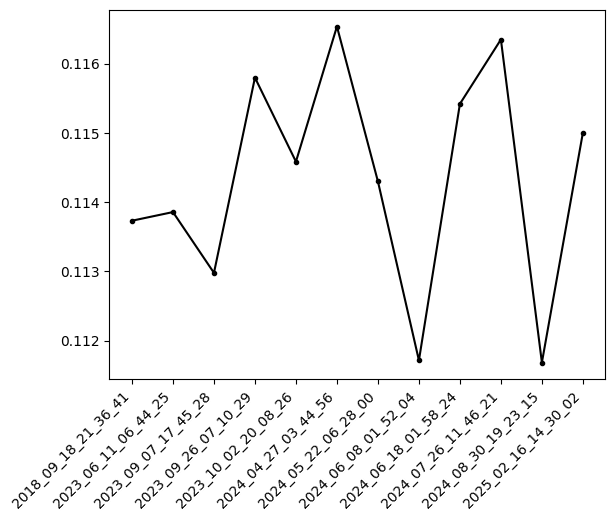

In [9]:
plt.plot(event_name,freq,'.-k')
plt.xticks(rotation=45, ha='right')
